# **Prediction based Embedding menggunakan Word2Vec**

# 1. Install and Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import tensorflow as tf

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 2. Data Acquisition

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/meodai/color-names/master/src/colornames.csv')
data.head()

,name,hex,good name
0,100 Mph,#c93f38,x
1,18th Century Green,#a59344,NaN
2,1975 Earth Red,#7b463b,NaN
3,1989 Miami Hotline,#dd3366,NaN
4,20000 Leagues Under the Sea,#191970,x


# 3. Text Preprocessing

In [4]:
import re

def text_preprocessing(text):
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'[-+]?[0-9]+', '', text)
    text = re.sub(r'[^\w\s]','', text)
    text = text.strip()
    return text

In [5]:
%time data['clean_teks'] = data['name'].apply(text_preprocessing)

CPU times: user 109 ms, sys: 5.76 ms, total: 114 ms
Wall time: 117 ms


In [6]:
data.head(10)

,name,hex,good name,clean_teks
0,100 Mph,#c93f38,x,mph
1,18th Century Green,#a59344,NaN,th century green
2,1975 Earth Red,#7b463b,NaN,earth red
3,1989 Miami Hotline,#dd3366,NaN,miami hotline
4,20000 Leagues Under the Sea,#191970,x,leagues under the sea
5,24 Carrot,#e56e24,x,carrot
6,24 Karat,#dfc685,x,karat
7,3AM in Shibuya,#225577,x,am in shibuya
8,3am Latte,#c0a98e,x,am latte
9,400XT Film,#d2d2c0,NaN,xt film


# 4. Word Embedding

In [7]:
import gensim
gensim.__version__

'4.3.2'

In [8]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

sentences = data['clean_teks'].apply(lambda x: tokenization(x.lower()))
sentences

0                             [mph]
1              [th, century, green]
2                      [earth, red]
3                  [miami, hotline]
4        [leagues, under, the, sea]
                    ...            
30217                     [zumthor]
30218                [zunda, green]
30219                        [zuni]
30220                [zürich, blue]
30221               [zürich, white]
Name: clean_teks, Length: 30222, dtype: object

In [9]:
EMBEDDING_SIZE = 100
WINDOW_SIZE = 5
MIN_WORD  = 1
EPOCH = 10
SG = 1
NEGATIVE = 5

In [11]:
%%time

from gensim.models import Word2Vec, FastText, KeyedVectors

model_word2vec = Word2Vec(sentences, vector_size=EMBEDDING_SIZE, sg=SG, min_count=MIN_WORD, window=WINDOW_SIZE, negative=NEGATIVE, epochs=EPOCH)

CPU times: user 2.41 s, sys: 30.2 ms, total: 2.44 s
Wall time: 2.33 s


In [12]:
model_word2vec.save('myvec-word2vec-100.model')

In [13]:
word2vec_word_vectors = model_word2vec.wv
word2vec_word_vectors.save('myvec-word2vec-100.wordvectors')

In [14]:
model_word2vec.wv['white']

array([-0.05397935,  0.32731318,  0.18651617,  0.05779621,  0.11531378,
       -0.6196452 ,  0.24981365,  0.8844904 , -0.4776873 , -0.4646988 ,
       -0.06222136, -0.5606463 ,  0.13026448,  0.39943355,  0.1454302 ,
       -0.18587881,  0.1488771 , -0.08632326, -0.19410123, -0.71771824,
        0.3647137 ,  0.09676088,  0.29740858, -0.2310486 , -0.08876875,
       -0.05225303, -0.2650689 , -0.06896566, -0.3623861 , -0.08861355,
        0.37356007,  0.02295939, -0.01109015, -0.34992543,  0.00252098,
        0.5348989 ,  0.1792818 , -0.16891469, -0.29365057, -0.5133918 ,
        0.16143642, -0.41468462, -0.11176073,  0.14784056,  0.15791626,
       -0.25594038, -0.38294032, -0.14333819,  0.24698077,  0.18480991,
        0.05777409, -0.25647804, -0.11857032,  0.01257947, -0.04572921,
        0.14860456,  0.19419812,  0.01630726, -0.2875113 ,  0.20332532,
       -0.08999471, -0.0064762 ,  0.05151354, -0.0475325 , -0.4552768 ,
        0.4040117 ,  0.24859071,  0.3132037 , -0.24994865,  0.25

In [15]:
model_word2vec.wv.most_similar('white')

[('red', 0.9992881417274475),
 ('pink', 0.9992802739143372),
 ('grey', 0.9992585182189941),
 ('blue', 0.9992529153823853),
 ('brown', 0.9992319941520691),
 ('green', 0.9992244839668274),
 ('purple', 0.9992130398750305),
 ('rose', 0.9991775155067444),
 ('yellow', 0.9991198778152466),
 ('gold', 0.9989777207374573)]

In [17]:
word_list = ['zürich', 'blue', 'green', 'red', 'earth', 'miami', 'under']

# daftar vektor dari kata-kata tersebut
word_vectors = np.array([model_word2vec.wv[w] for w in word_list])
print(word_vectors)

[[ 3.30301421e-03  1.87088188e-03 -3.79291200e-03  7.60761613e-04
  -3.01928283e-03  1.02891931e-02 -9.61217657e-03 -6.92343526e-03
   8.48968979e-03 -5.10155596e-03 -3.81917274e-03 -1.45829807e-03
   8.65168311e-03 -2.27837288e-03 -5.32465475e-03  2.11277697e-03
  -6.79538678e-03  1.00665651e-02  3.77681456e-03 -5.69330435e-03
   4.79658693e-03  6.43553585e-03 -1.01910504e-02  5.57026360e-03
   3.24489921e-03 -6.87304046e-03  2.63546710e-03  5.16383722e-03
   3.82498535e-03 -4.08759760e-03 -8.37382581e-03 -1.01101007e-02
   8.40724632e-03  5.45960292e-03 -8.44945759e-03 -3.54108680e-03
   4.32034628e-03 -1.17209321e-03 -5.16051799e-03 -1.79384649e-03
  -7.43936235e-03  1.49086898e-03  7.66841182e-03  5.38545614e-03
  -7.13471323e-03 -6.44706702e-03  1.16360076e-02  9.71126929e-03
  -2.23037438e-03  1.61106035e-03  8.45063198e-03 -5.52046997e-03
  -7.90900085e-03 -1.67425221e-03  5.75965270e-03  2.78229173e-03
  -1.68217695e-03  1.32939918e-03  9.60267242e-03 -4.17238753e-03
   9.19539

In [18]:
from sklearn.decomposition import PCA, KernelPCA

dimred = PCA(n_components=2, copy=False, whiten=True)
red_word_vectors = dimred.fit_transform(word_vectors)

In [19]:
red_word_vectors

array([[-0.9576963 ,  0.5538425 ],
       [ 1.2368443 ,  1.8276379 ],
       [ 1.0995512 , -1.0374795 ],
       [ 0.80347365, -0.9367381 ],
       [-0.45587072, -0.4351709 ],
       [-0.8461882 , -0.3096146 ],
       [-0.8801138 ,  0.33752277]], dtype=float32)

In [20]:
def plot(datas, labels, fc='yellow'):
    plt.subplots_adjust(bottom = 0.1)
    plt.scatter(datas[:, 0], datas[:, 1], marker='o')

    for label, x, y in zip(labels, datas[:, 0], datas[:, 1]):
        plt.annotate(label, \
                    xy=(x, y), xytext=(-15, 15), \
                    textcoords='offset points', ha='right', va='bottom', \
                    bbox=dict(boxstyle='round,pad=0.3', fc=fc, alpha=0.5), \
                    arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    plt.show()

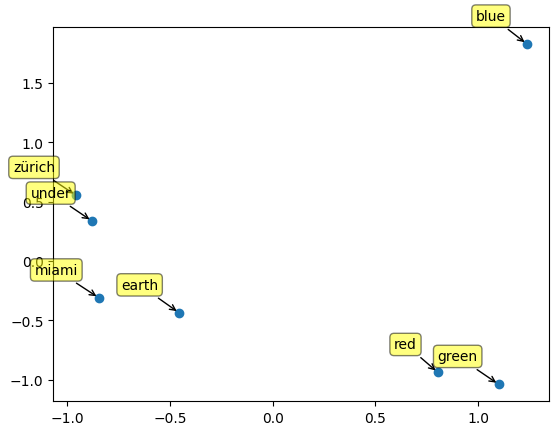

In [21]:
plot(red_word_vectors, word_list)